# POLI 175

## Class 04 - Some Julia (cont'd) and Regression

Dr. Umberto Mignozzetti

UCSD

# Julia

## [Libraries](https://juliadatascience.io/standardlibrary):

In [1]:
# Library for dates
using Dates

In [2]:
Date(1999)

1999-01-01

In [3]:
Date(1999, 02, 03)

1999-02-03

## [Libraries](https://docs.julialang.org/en/v1/stdlib/Random/):

In [4]:
# Library for random numbers
using Random

In [5]:
# One random number between [0, 1)
rand()

0.6660866940643375

In [6]:
# Two random numbers between [0, 1)
rand(10)

10-element Vector{Float64}:
 0.6280451132986984
 0.23715279962137892
 0.28025725954548597
 0.1674538911005825
 0.7548718095844031
 0.11961141654308549
 0.7936465373857218
 0.05479035599683324
 0.5243735771042959
 0.21123386051492088

## Install Libraries

In [7]:
# Library for Libraries
using Pkg

In [8]:
# Install dataframes library
Pkg.add("DataFrames")

# Install library for csv files
Pkg.add("CSV")

# Install library for plotting
Pkg.add("Plots")

# Install library for regression
Pkg.add("GLM")

# Install library for regression
Pkg.add("StatsBase")

LoadError: SystemError: opening file "/opt/julia/logs/manifest_usage.toml": Permission denied

## Load CSV files

In [9]:
# Load packages
using CSV, DataFrames, Plots, GLM, StatsBase

LoadError: ArgumentError: Package CSV not found in current path:
- Run `import Pkg; Pkg.add("CSV")` to install the CSV package.


In [10]:
# Loading Education Expenditure dataset
urldat = "https://raw.githubusercontent.com/umbertomig/POLI175julia/main/data/educexp.csv"
educexp = CSV.read(download(urldat, DataFrame)

LoadError: UndefVarError: CSV not defined

## Exploring

In [28]:
# Dataset dimension
size(educexp)

(51, 5)

In [29]:
# Column names
names(educexp)

5-element Vector{String}:
 "education"
 "income"
 "young"
 "urban"
 "states"

## Exploring

In [30]:
# Head
first(educexp, 3)

Row,education,income,young,urban,states
,Int64,Int64,Float64,Int64,String3
1,189,2824,350.7,508,ME
2,169,3259,345.9,564,NH
3,230,3072,348.5,322,VT


In [31]:
# Tail
last(educexp, 3)

Row,education,income,young,urban,states
,Int64,Int64,Float64,Int64,String3
1,273,3968,348.4,909,CA
2,372,4146,439.7,484,AK
3,212,3513,382.9,831,HI


## Exploring

In [32]:
describe(educexp)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,education,196.314,112,192.0,372,0,Int64
2,income,3225.29,2081,3257.0,4425,0,Int64
3,young,358.886,326.2,354.1,439.7,0,Float64
4,urban,664.51,322,664.0,1000,0,Int64
5,states,,AK,,WY,0,String3


# Regression Analysis

# Regression

- Regression analysis is one of the most studied approaches for Supervised ML.

- It has been around for a long time: we know it well.

- it is a great starting point for learning more sophisticated methods.

# Regression

- Consider that we run a survey to measure the `prestige` of several professions in the U.S. (We are going to study a survey like this in the next class.)

- A few questions about `prestige`:
    + Is there a relationship between `prestige` and `income`?
    + How strong is the relationship between `prestige` and `income`?
    + Which variables are associated with `prestige`?
    + How can we accurately predict the prestige of professions not studied in this survey?
    + Is the relationship linear?
    + Is there a synergy among predictors?
    
- These are relevant questions, and regression analysis can help us here.

## Simple Linear Regression

### Estimation

- It lives for its name! A very simple approach to regression:

- Let:
    + $y_i$ the variable we want to predict
    + $x_i$ is the variable we will be using to make the prediction.
    + And if we assume a linear relationship, we want to find a slope $\beta_1$ and an intercept $\beta_0$.
    + $n$ the number of observations
    + $i$ a given observation.
    + Thus:

$$ y_i \approx \beta_0 + \beta_1 x_i $$

## Simple Linear Regression

### Estimation

How do we estimate $\beta_0$ and $\beta_1$? 

![reg](https://github.com/umbertomig/POLI175julia/blob/e0a55ce2350643ed200a482a3581479c6a8e3f74/img/fig1.png?raw=true)

## Simple Linear Regression

### Estimation

- We are searching, among all the possible lines, for the one that does `best`.

- What does `best` mean in this context?

- One concept: minimize the distance between the `predicted` values and the `actual` value.

- Predicted value:

$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

## Simple Linear Regression

### Estimation

- Actual value:

$$ y_i = \hat{y}_i + e_i = \hat{\beta}_0 + \hat{\beta}_1 x_i + e_i $$

- And `best` here will mean that we minimized the **residuals sum of squares**:

$$ RSS \ = \ e_1^2 + e_2^2 + \cdots + e_n^2 $$

- It is a well-behaved function on $\hat{\beta}_0$ and $\hat{\beta}_1$.

## Simple Linear Regression

### Estimation

- With simple optimization, we can find the $\hat{\beta}$s that minimize this.

![reg](https://github.com/umbertomig/POLI175julia/blob/e0a55ce2350643ed200a482a3581479c6a8e3f74/img/fig2.png?raw=true)

## Simple Linear Regression

### Assessing the accuracy of the estimates

We rarely know the true estimates $\beta_1$ and $\beta_0$ (we only do if we `cook the data`).

How do we know how good these $\hat{\beta}_1$ and $\hat{\beta}_0$ are as an approximation of the true $\beta$s?

## Simple Linear Regression

### Assessing the accuracy of the estimates

![reg](https://github.com/umbertomig/POLI175julia/blob/e0a55ce2350643ed200a482a3581479c6a8e3f74/img/fig3.png?raw=true)

## Simple Linear Regression

### Assessing the accuracy of the estimates

- We find how precise our estimates are by computing the `standard error`.

- In some sense, the standard error of the $\beta_k$ in question is the square root of the variance of it.

- The variance, for each of the $\hat{\beta}$s in here, is:

$$ SE(\hat{\beta}_0)^2 = \sigma^2\left[\dfrac{1}{n} + \dfrac{\overline{x}^2}{\sum_i(x_i-\overline{x})^2}\right]\ , \quad SE(\hat{\beta}_1)^2 = \dfrac{\sigma^2}{\sum_i(x_i-\overline{x})^2}$$

## Simple Linear Regression

### Assessing the accuracy of the estimates

- And since $\sigma^2 = Var(\varepsilon)$, i.e., the real error term, we need also to estimate it:

$$ \sigma \ = \ \sqrt{\dfrac{RSS}{n-2}} $$

- These standard errors give us an idea of how much we can `trust` our estimates. The smaller, the better!

## Simple Linear Regression

### Assessing the accuracy of the estimates

#### Confidence Intervals

- We can also put together a `confidence interval` for our estimates:

- A 95\% confidence interval looks like this:

$$ \hat{\beta}_k \pm 2 \times SE(\hat{\beta}_k) $$

- The number 2 would change depending on the confidence levels you choose.


## Simple Linear Regression

### Assessing the accuracy of the estimates

#### Hypothesis testing

- We can also test whether the coefficient could be considered `statistically different` than zero.

- We test the hypothesis (called null hypothesis):

$$ H_0: \beta_k = 0 $$

- Against the hypothesis (called an alternative hypothesis):

$$ H_a: \beta_k \neq 0 $$

## Simple Linear Regression

### Assessing the accuracy of the estimates

#### Hypothesis testing

And to do that, we put together the `t-statistic`:

$$ t = \dfrac{\hat{\beta}_k - 0}{SE(\hat{\beta}_k)} \ \sim \ \text{Student's-T}(n-2) $$

- And the p-value is the probability of finding a value larger than $t$ in the Student's-T distribution.

## Simple Linear Regression

### Assessing the accuracy of the whole model

#### RSE

The residual standard error is one of the best measures of the fit quality.

As we said in the second class, it is the criterium we use for most Supervised Machine Learning models.

It is defined as:

$$ \text{RSE} \ = \ \sqrt{\dfrac{RSS}{n-2}} \ = \ \sqrt{\dfrac{\sum_i(y_i - \hat{y}_i)^2}{n-2}} $$

The lower, the better.

## Simple Linear Regression

### Assessing the accuracy of the whole model

#### $R^2$

The $R^2$ is a measure of goodness-of-fit.

It is widely used because it is between zero and one.

The proportion of the variability of $Y$ that is explained by modeling it using $X$.

It is defined as:

$$ \text{R}^2 \ = \ \dfrac{TSS - RSS}{TSS} \  = \ 1 - \dfrac{RSS}{TSS} $$

And the total sum of squares is defined as $TSS = \sum_i(y_i-\overline{y})^2$. 

The higher the $R^2$, the better.

## Simple Linear Regression

### Assessing the accuracy of the whole model

#### F-Statistic

- Not now! First, multiple Linear Regression :)

## Multiple Linear Regression

- We use multiple linear regression when we have multiple predictors for the same outcome variable.

- Let:
    + $y_i$ the variable we want to predict
    + $x_{ik}$ are the variables we will use to make the prediction.
    + $p$: number of predictors.
    + And if we assume a linear relationship, we want to find a slope $\beta_1$ and an intercept $\beta_0$.
    + $n$ the number of observations
    + $i$ a given observation
    + $k$ and $l$: given predictors
    + Thus:
    
$$ y_i \ = \ \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + \cdots + \beta_px_{ip} + \varepsilon $$

### Estimation

- And the residual sum of squares is defined similarly as before, but we optimize over more parameters:

$$ \text{RSS} \ = \ \sum_ie_i^2 \ = \ \sum_i(y_i - \hat{\beta}_0 - \hat{\beta}_1x_{i1} - \cdots - \hat{\beta}_px_{ip})^2 $$

![reg](https://github.com/umbertomig/POLI175julia/blob/e0a55ce2350643ed200a482a3581479c6a8e3f74/img/fig4.png?raw=true)

### Assessing accuracy

#### F-Statistic

- Now, yes! The F-Statistic tests whether at least one predictor are different from zero.

- The null hypothesis is:

$$ H_0: \ \beta_1 = \beta_2 = \cdots = \beta_p $$

### Assessing accuracy

#### F-Statistic

- And the alternative hypothesis is:

$$ H_a: \ \exists k \in \{1, \cdots, p\}, \ s.t. \ \beta_k \neq 0 $$

- And $F$ is equal to:

$$ \text{F} \ = \ \dfrac{\frac{TSS-RSS}{p}}{\frac{RSS}{n-p-1}} \ \sim \ F(p, n-p-1) $$

### Assessing accuracy

#### F-Statistic

- Why is this a good test? Because under the null hypothesis:

$$ \mathbb{E}\left[\dfrac{TSS-RSS}{p}\right] = \mathbb{E}\left[\dfrac{RSS}{n-p-1}\right] = \sigma^2 $$

- And so, $F \approx 1$ under $H_0$.


#### F-Statistic for model selection

- Suppose we have $\{1, \cdots, l \}$ predictors, but we could add $\{l+1, \cdots, p \}$ extra predictors in our model.

- Does that make sense? We can test the RSS of the restricted model against the RSS of the full model.

- The null hypothesis is:

$$ H_0: \ \beta_{l+1} = \cdots = \beta_{p} = 0 $$

- And the F-Stat:

$$ \text{F} \ = \ \dfrac{\frac{RSS_0-RSS}{p-l}}{\frac{RSS}{n-p-1}} \ \sim \ F(p-l, n-p-1) $$

## Scatterplot

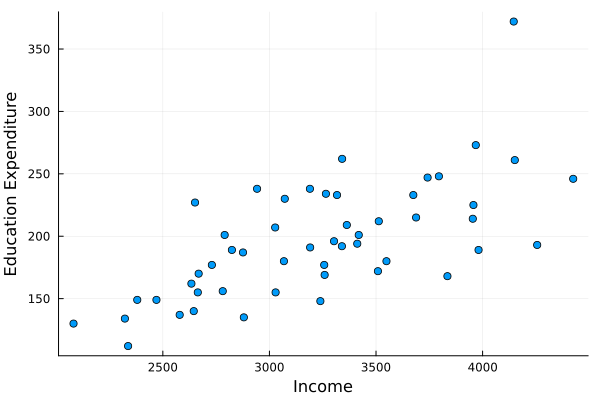

In [36]:
scatter(
    educexp.income,
    educexp.education,
    xlabel = "Income", 
    ylabel = "Education Expenditure",
    legend = false
)

## Linear Regression

In [38]:
fm = @formula(education ~ income)
mod = lm(
    fm,
    educexp
)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

education ~ 1 + income

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  17.71       28.8738      0.61    0.5425  -40.3141     75.7342
income        0.0553759   0.00882287  6.28    <1e-07    0.0376457   0.0731062
─────────────────────────────────────────────────────────────────────────────

## Linear Regression

In [38]:
# Standard errors
stderr(mod)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

education ~ 1 + income

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  17.71       28.8738      0.61    0.5425  -40.3141     75.7342
income        0.0553759   0.00882287  6.28    <1e-07    0.0376457   0.0731062
─────────────────────────────────────────────────────────────────────────────

In [38]:
# Predicted values for each state
println(predict(mod))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

education ~ 1 + income

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  17.71       28.8738      0.61    0.5425  -40.3141     75.7342
income        0.0553759   0.00882287  6.28    <1e-07    0.0376457   0.0731062
─────────────────────────────────────────────────────────────────────────────

In [ ]:
# R2
r2(mod)

## Linear Regression

In [38]:
fm = @formula(education ~ income + young)
mod2 = lm(
    fm,
    educexp
)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

education ~ 1 + income

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.   Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  17.71       28.8738      0.61    0.5425  -40.3141     75.7342
income        0.0553759   0.00882287  6.28    <1e-07    0.0376457   0.0731062
─────────────────────────────────────────────────────────────────────────────

## Linear Regression

Your turn: Run the regression with all variables but states.

In [ ]:
# Your code here

# Questions?

# See you next class
